In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
df["Month"].duplicated().sum()

0

In [6]:
df["Month"]=pd.to_datetime(df["Month"])

In [7]:
print(df["Month"].min() ,df["Month"].max())

1949-01-01 00:00:00 1960-12-01 00:00:00


In [8]:
df.shape

(144, 2)

In [9]:
a=pd.date_range(start="1949-01-01",end="1960-12-01",freq="MS")

In [10]:
a.shape

(144,)

In [11]:
print(len(set(a).intersection(set(df['Month']))))
print(len(set(a).difference(set(df['Month']))))

144
0


### No missing values btw the series now we can start next steps

In [12]:
#df.set_index("Month")

In [13]:
df1=df.copy()

In [14]:
df1["Year"]=df["Month"].dt.year
df1["Quarter"]=df["Month"].apply(lambda x: x.quarter)
df1["month"]=df1["Month"].apply(lambda x:x.month)

In [15]:
df1.head()

,Month,#Passengers,Year,Quarter,month
0,1949-01-01,112,1949,1,1
1,1949-02-01,118,1949,1,2
2,1949-03-01,132,1949,1,3
3,1949-04-01,129,1949,2,4
4,1949-05-01,121,1949,2,5


In [16]:
pt1=pd.pivot_table(data=df1,columns=["Year"],index=["month"],values=["#Passengers"])
pt1

#Passengers                                                       
Year         1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
month                                                                   
1             112  115  145  171  196  204  242  284  315  340  360  417
2             118  126  150  180  196  188  233  277  301  318  342  391
3             132  141  178  193  236  235  267  317  356  362  406  419
4             129  135  163  181  235  227  269  313  348  348  396  461
5             121  125  172  183  229  234  270  318  355  363  420  472
6             135  149  178  218  243  264  315  374  422  435  472  535
7             148  170  199  230  264  302  364  413  465  491  548  622
8             148  170  199  242  272  293  347  405  467  505  559  606
9             136  158  184  209  237  259  312  355  404  404  463  508
10            119  133  162  191  211  229  274  306  347  359  407  461
11            104  114  146  172  180  203  237  271  305  310  362  390
12            118  140  166  194  201  229  278  306  336  337  405  432

In [17]:
pt2 = pd.pivot_table(data=df1,columns=['Year'],index=['Quarter'],values=['#Passengers'])
pt2

#Passengers                                                  \
Year           1949        1950        1951        1952        1953   
Quarter                                                               
1        120.666667  127.333333  157.666667  181.333333  209.333333   
2        128.333333  136.333333  171.000000  194.000000  235.666667   
3        144.000000  166.000000  194.000000  227.000000  257.666667   
4        113.666667  129.000000  158.000000  185.666667  197.333333   

                                                                     \
Year           1954        1955        1956        1957        1958   
Quarter                                                               
1        209.000000  247.333333  292.666667  324.000000  340.000000   
2        241.666667  284.666667  335.000000  375.000000  382.000000   
3        284.666667  341.000000  391.000000  445.333333  466.666667   
4        220.333333  263.000000  294.333333  329.333333  335.333333   

                                 
Year           1959        1960  
Quarter                          
1        369.333333  409.000000  
2        429.333333  489.333333  
3        523.333333  578.666667  
4        391.333333  427.666667

In [18]:
plot_data = pt1.iloc[:,-4:]
plot_data

#Passengers               
Year         1957 1958 1959 1960
month                           
1             315  340  360  417
2             301  318  342  391
3             356  362  406  419
4             348  348  396  461
5             355  363  420  472
6             422  435  472  535
7             465  491  548  622
8             467  505  559  606
9             404  404  463  508
10            347  359  407  461
11            305  310  362  390
12            336  337  405  432

In [19]:
plot_data_2 = pt2.iloc[:,-4:]
plot_data_2

#Passengers                                    
Year           1957        1958        1959        1960
Quarter                                                
1        324.000000  340.000000  369.333333  409.000000
2        375.000000  382.000000  429.333333  489.333333
3        445.333333  466.666667  523.333333  578.666667
4        329.333333  335.333333  391.333333  427.666667

In [20]:
cols=[i[1] for i in plot_data.columns]
cols

[1957, 1958, 1959, 1960]

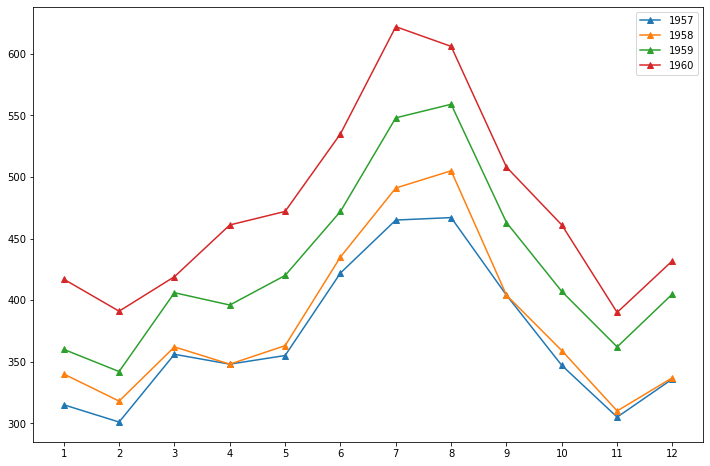

In [21]:
plt.figure(figsize=(12,8))
plt.plot(plot_data,label=cols,marker="^")
plt.legend()
plt.xticks(list(range(1,13)))
plt.show()

### Quaterwise passengers

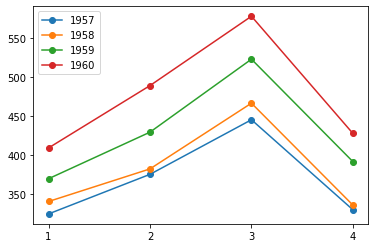

In [22]:
plt.plot(plot_data_2,label=cols,marker='o')
plt.legend()
plt.xticks(list(range(1,5)))
plt.show()

#### from the graphs we can draw a inference that in the third quarter every year there is a surge in passengers booking flights

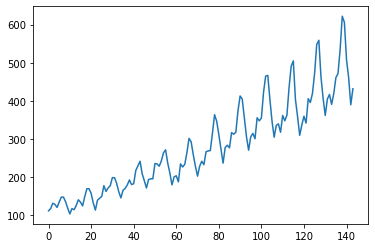

In [23]:
plt.plot(df["#Passengers"])
plt.show()

#### just from seeing the graph we can see that the graph is mulltiplicative
<b>x=constant * trend * seasonality</b>

### but we will confirm it by doing seasonal Decompose

### Seasonal Decomposition

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
d1 = df.copy()
d2 = df.set_index('Month').copy()
d3 = df.set_index('Month').copy()
d4 = df.set_index('Month').copy()

In [26]:
d2.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


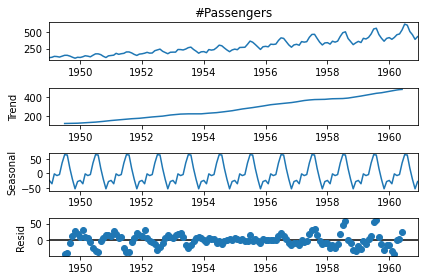

In [27]:
# Decompose time series into monthly trend, seasonal, and residual components.

decomp = seasonal_decompose(d2['#Passengers'], period = 12,model="add")
# Plot the decomposed time series to interpret.
decomp.plot();


<br>Now as you can see <b> just for clarification i put the wrong assumption that  model is addictive </b> </br>
<br>but as we can see in residuals there is a trend and our residuals must be in 0 or 1 and not have any trend </br>
<br> so we intreprete from the graph that this series is not addictive</br>

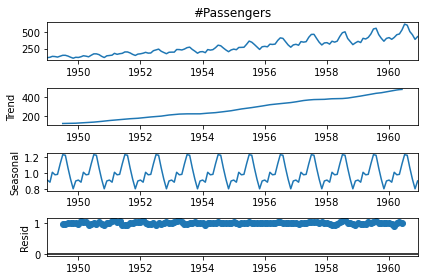

In [28]:
decomp = seasonal_decompose(d2['#Passengers'], period = 12,model="mul")
# Plot the decomposed time series to interpret.
decomp.plot();

### from the residuals we can interprete that this is a multiplicative time series

### Now Making the time series Stationary

In [29]:
d2

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


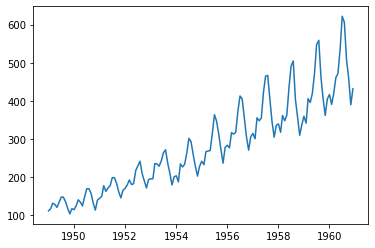

In [30]:
plt.plot(d2["#Passengers"])

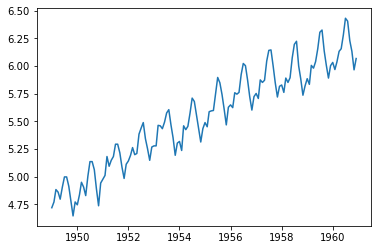

In [31]:
plt.plot(np.log(d2["#Passengers"]))

In [32]:
from scipy.stats import boxcox

In [33]:
y1,i=boxcox(d2["#Passengers"])

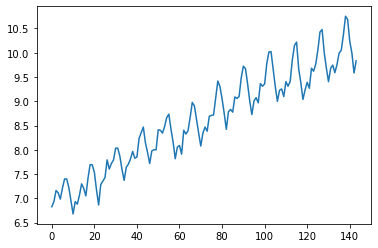

In [34]:
plt.plot(y1)

In [35]:
from statsmodels.tsa.stattools import adfuller

In [36]:
def adf_test(data):
    res = adfuller(data)
    print('Test_Stat',res[0])
    print('p',res[1])
    if res[1] > 0.05:
        print('Ho accepted : Data is not Stationary')
    else:
        print('H1 accepted : Data is Staionary')

In [37]:
adf_test(y1)

Test_Stat -1.3260708968567576
p 0.617162065700367
Ho accepted : Data is not Stationary


#### we need to differencing to make it stationary

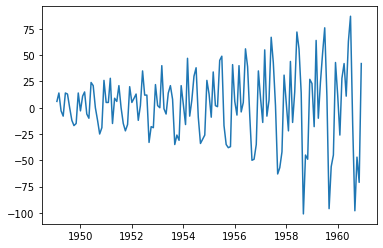

In [38]:
plt.plot(d2.diff().dropna())

In [39]:
adf_test(d2.diff().dropna())

Test_Stat -2.8292668241699994
p 0.0542132902838255
Ho accepted : Data is not Stationary


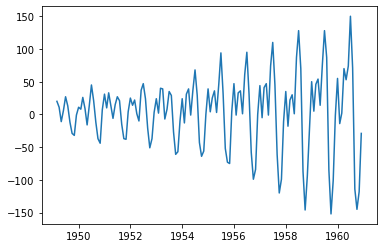

In [40]:
plt.plot(d2.diff(2).dropna())

In [41]:
adf_test(d2.diff(2).dropna())

Test_Stat -2.9616951355554244
p 0.03862975767698839
H1 accepted : Data is Staionary


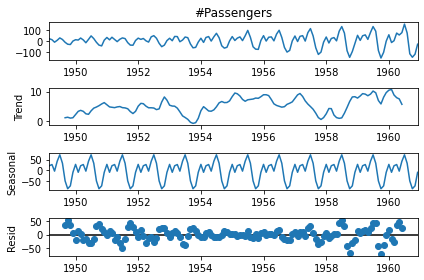

In [42]:
decomp = seasonal_decompose((d2['#Passengers']).diff(2).dropna(), period = 12)
# Plot the decomposed time series to interpret.
decomp.plot();

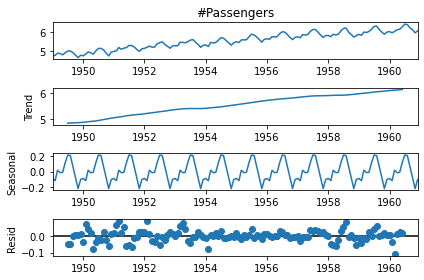

In [43]:
decomp = seasonal_decompose(np.log(d2['#Passengers']), period = 12)
# Plot the decomposed time series to interpret.
decomp.plot();

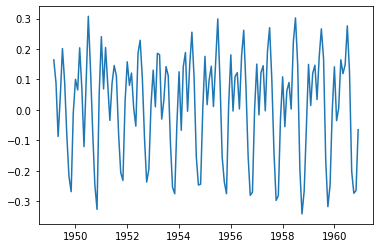

In [44]:
plt.plot(np.log(d2).diff(2).dropna())

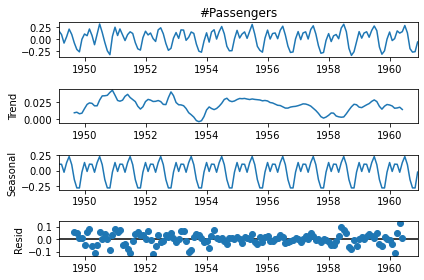

In [45]:
decomp = seasonal_decompose((np.log(d2['#Passengers'])).diff(2).dropna(), period = 12)
# Plot the decomposed time series to interpret.
decomp.plot();

In [46]:
adf_test(np.log(d2).diff(2).dropna())

Test_Stat -3.167907375288738
p 0.021919114564039218
H1 accepted : Data is Staionary


In [59]:
d22=(np.log(d2)).diff(2)

In [60]:
d22

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,0.164303
1949-04-01,0.089128
1949-05-01,-0.087011
...,...
1960-08-01,0.124613
1960-09-01,-0.202459
1960-10-01,-0.273482


In [61]:
d22

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,0.164303
1949-04-01,0.089128
1949-05-01,-0.087011
...,...
1960-08-01,0.124613
1960-09-01,-0.202459
1960-10-01,-0.273482


In [49]:
train = d22.iloc[:101]
test = d22.iloc[101:]
print(train.shape)
print(test.shape)

NameError: name 'd22' is not defined

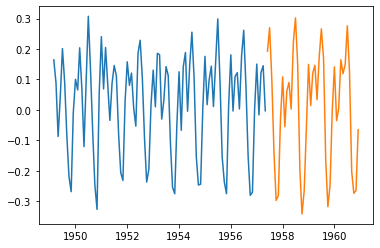

In [63]:
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.show()

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

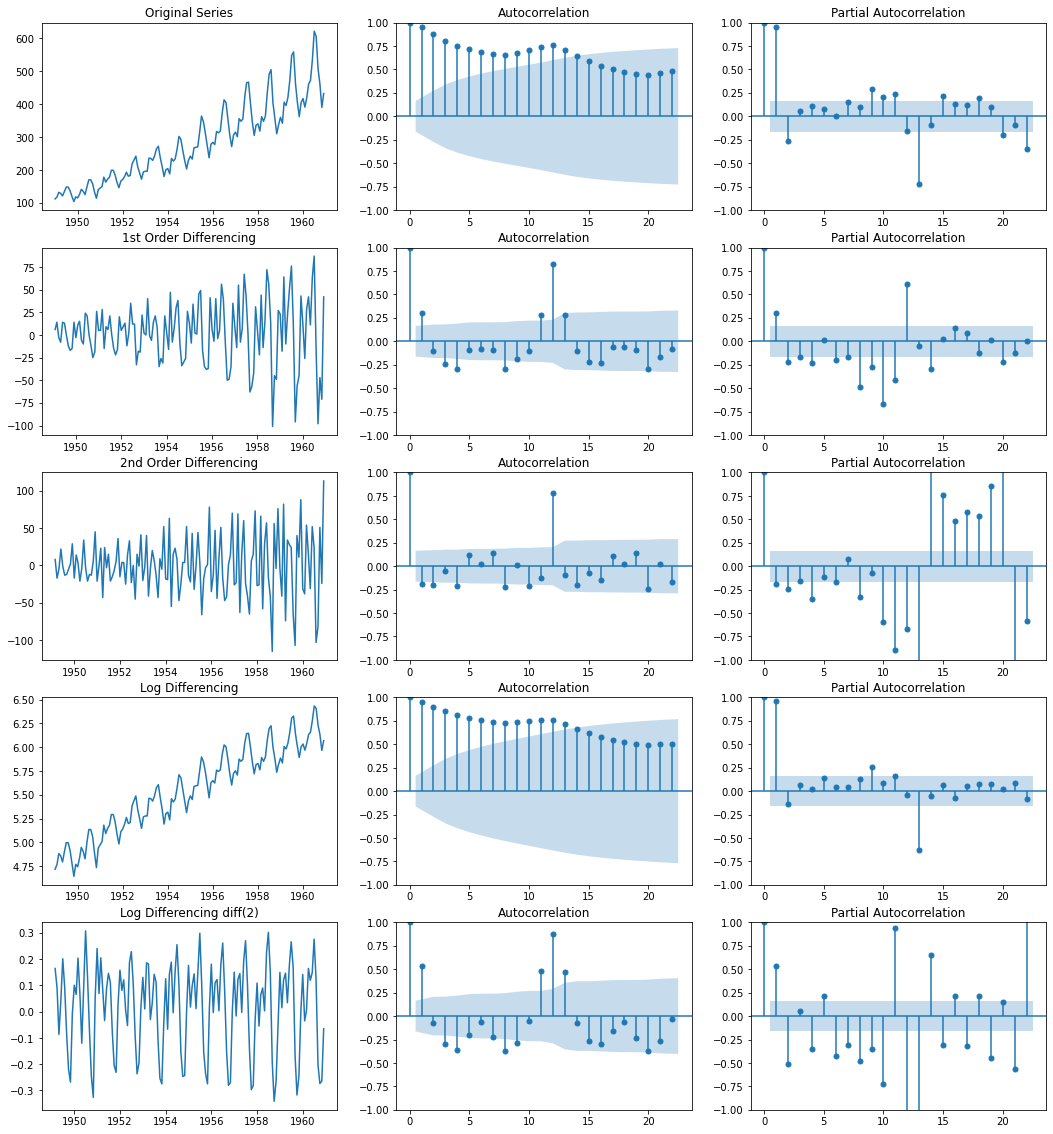

In [48]:
fig, axes = plt.subplots(5,3,figsize=(18,20))

# Original Data
axes[0,0].plot(d2)
axes[0,0].set_title('Original Series')
plot_acf(d2,ax=axes[0,1])
plot_pacf(d2,ax=axes[0,2])

# 1st differencing
axes[1,0].plot(d2.diff(1))
axes[1,0].set_title('1st Order Differencing')
plot_acf(d2.diff(1).dropna(),ax=axes[1,1])
plot_pacf(d2.diff(1).dropna(),ax=axes[1,2])

# 2nd differencing
axes[2,0].plot(d2.diff().diff())
axes[2,0].set_title('2nd Order Differencing')
plot_acf(d2.diff().diff().dropna(),ax=axes[2,1])
plot_pacf(d2.diff().diff().dropna(),ax=axes[2,2])

# log
axes[3,0].plot(np.log(d2))
axes[3,0].set_title('Log Differencing')
plot_acf(np.log(d2),ax=axes[3,1])
plot_pacf(np.log(d2),ax=axes[3,2])

axes[4,0].plot(np.log(d2).diff(2))
axes[4,0].set_title('Log Differencing diff(2)')
plot_acf(np.log(d2).diff(2).dropna(),ax=axes[4,1])
plot_pacf(np.log(d2).diff(2).dropna(),ax=axes[4,2])


plt.show()

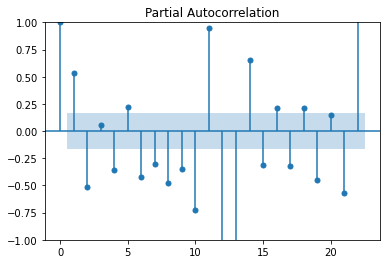

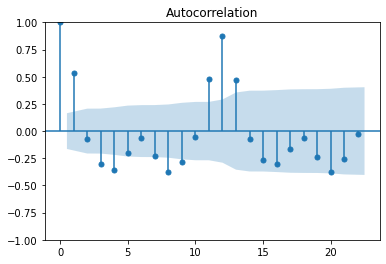

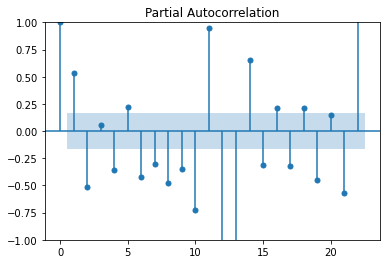

In [65]:
best stationary time series is np.log(d2).diff(2)

In [72]:
d22.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,0.164303
1949-04-01,0.089128
1949-05-01,-0.087011
1949-06-01,0.045462
1949-07-01,0.201422
1949-08-01,0.091937
1949-09-01,-0.084557


In [54]:
from statsmodels.tsa.arima.model import ARIMA

In [75]:
train

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,0.164303
1949-04-01,0.089128
1949-05-01,-0.087011
...,...
1957-01-01,0.150454
1957-02-01,-0.016475
1957-03-01,0.122358


In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [79]:
def eval_model(test,pred,model_name):
    mae = mean_absolute_error(test,pred)
    mse = mean_squared_error(test,pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test,pred)
    res = pd.DataFrame({'MAE':mae,'MSE':mse,'RMSE':rmse,'MAPE':mape},index=[model_name])
    return res

def plot_res(train,test,fcast):
    plt.plot(train,label='Train')
    plt.plot(test,label='Test')
    plt.plot(fcast,label='Forecast')
    plt.legend()
    plt.show()

In [80]:
def arima_fun(p,d,q,model_name):
    model = ARIMA(train,order=(p,d,q))
    arima_fit = model.fit()
    fcast = np.exp(arima_fit.forecast(len(test)))
    print(fcast)
    plot_res(np.exp(train),np.exp(test),fcast)
    model_res = eval_model(test,fcast,model_name)
    return model_res, fcast

In [81]:
d2=np.log(d2)

In [82]:
d2.head()

,#Passengers
Month,
1949-01-01,-0.822763
1949-02-01,-0.806807
1949-03-01,-0.774275
1949-04-01,-0.780761
1949-05-01,-0.799321


In [83]:
d2.shape

(144, 1)

In [84]:
train=d2.iloc[:101]
test=d2.iloc[101:]

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1957-06-01    0.572663
1957-07-01    0.574185
1957-08-01    0.575706
1957-09-01    0.577231
1957-10-01    0.578760
1957-11-01    0.580292
1957-12-01    0.581829
1958-01-01    0.583370
1958-02-01    0.584914
1958-03-01    0.586463
1958-04-01    0.588016
1958-05-01    0.589574
1958-06-01    0.591135
1958-07-01    0.592700
1958-08-01    0.594270
1958-09-01    0.595844
1958-10-01    0.597421
1958-11-01    0.599003
1958-12-01    0.600590
1959-01-01    0.602180
1959-02-01    0.603775
1959-03-01    0.605374
1959-04-01    0.606977
1959-05-01    0.608584
1959-06-01    0.610196
1959-07-01    0.611812
1959-08-01    0.613432
1959-09-01    0.615056
1959-10-01    0.616685
1959-11-01    0.618318
1959-12-01    0.619955
1960-01-01    0.621597
1960-02-01    0.623243
1960-03-01    0.624894
1960-04-01    0.626548
1960-05-01    0.628208
1960-06-01    0.629871
1960-07-01    0.631539
1960-08-01    0.633212
1960-09-01    0.634888
1960-10-01    0.636570
1960-11-01    0.638255
1960-12-01    0.639946
Freq: MS, N

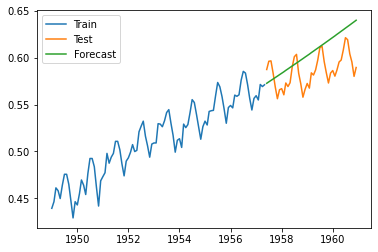

,MAE,MSE,RMSE,MAPE
"AR(1,2,1)",1.141069,1.302664,1.141343,2.135328


In [87]:

ar_res, ar_fcast = arima_fun(p=1,d=2,q=1,model_name="AR(1,2,1)")
ar_res